In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\Swattik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [97]:
data = pd.read_csv("final_ds2.csv")
data

,Subject,On Paper Duration (pentagons),On paper Duration (house),total duration (clock),total duration (cursive),number of pen-down strokes (cursive),Pressure average (cursive),DASS Scores,Stress
0,1,7107,11023,21398,23531,33,297.587270,13,Normal
1,3,10152,14305,39205,26279,42,348.658005,21,Moderate
2,4,7350,10920,22215,25618,39,97.101751,17,Moderate
3,6,11236,9118,44864,23274,34,431.931921,17,Moderate
4,33,13971,19535,69047,30511,45,415.328375,27,Severe
5,34,9787,21296,36034,31219,41,229.998456,25,Moderate
6,47,15017,16775,34059,27007,44,299.951981,32,Severe
7,81,8485,21084,31387,27031,38,146.316250,35,Severe
8,93,9240,12393,24701,24720,42,283.699450,25,Moderate
9,125,3872,7800,58595,30735,52,230.202721,15,Normal


In [98]:
data = data.drop('Subject',axis = 1)
data = data.drop('Pressure average (cursive)',axis = 1)


## Feature Engineering 

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   On Paper Duration (pentagons)         10 non-null     int64 
 1   On paper Duration (house)             10 non-null     int64 
 2   total duration (clock)                10 non-null     int64 
 3   total duration (cursive)              10 non-null     int64 
 4   number of pen-down strokes (cursive)  10 non-null     int64 
 5   DASS Scores                           10 non-null     int64 
 6   Stress                                10 non-null     object
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


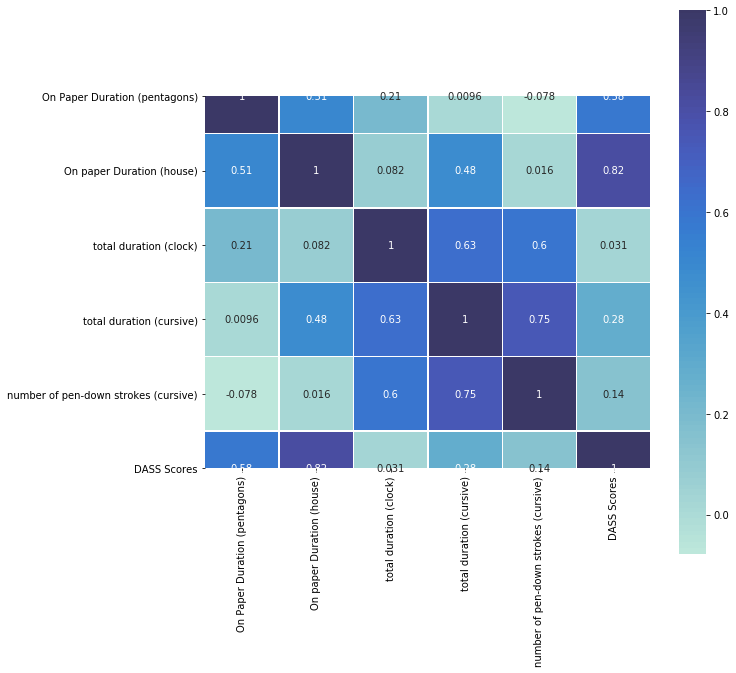

In [100]:
corr = data.corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sb.heatmap(corr,square=True,annot = True,linewidth = .5,center = 1.4,ax = axes)

In [101]:
data = data.drop('DASS Scores',axis = 1)

In [102]:
#Label Encoding
data['Stress'] = data['Stress'].replace({'Normal':'1','Moderate':'2', 'Severe':'3'})
data

,On Paper Duration (pentagons),On paper Duration (house),total duration (clock),total duration (cursive),number of pen-down strokes (cursive),Stress
0,7107,11023,21398,23531,33,1
1,10152,14305,39205,26279,42,2
2,7350,10920,22215,25618,39,2
3,11236,9118,44864,23274,34,2
4,13971,19535,69047,30511,45,3
5,9787,21296,36034,31219,41,2
6,15017,16775,34059,27007,44,3
7,8485,21084,31387,27031,38,3
8,9240,12393,24701,24720,42,2
9,3872,7800,58595,30735,52,1


In [8]:
y = data["Stress"]
y

0    1
1    2
2    2
3    2
4    3
5    2
6    3
7    3
8    2
9    1
Name: Stress, dtype: object

In [9]:
X = data.drop('Stress',axis = 1)
X

,On Paper Duration (pentagons),On paper Duration (house),total duration (clock),total duration (cursive),number of pen-down strokes (cursive)
0,7107,11023,21398,23531,33
1,10152,14305,39205,26279,42
2,7350,10920,22215,25618,39
3,11236,9118,44864,23274,34
4,13971,19535,69047,30511,45
5,9787,21296,36034,31219,41
6,15017,16775,34059,27007,44
7,8485,21084,31387,27031,38
8,9240,12393,24701,24720,42
9,3872,7800,58595,30735,52


In [10]:
# Scaling
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [11]:
X=pd.DataFrame(X)
X

,0,1,2,3,4
0,-0.807749,-0.719998,-1.129147,-1.242422,-1.528321
1,0.170338,-0.025376,0.071075,-0.256094,0.191040
2,-0.729695,-0.741797,-1.074080,-0.493344,-0.382080
3,0.518531,-1.123183,0.452501,-1.334666,-1.337281
4,1.397043,1.081531,2.082476,1.262881,0.764161
5,0.053096,1.454239,-0.142656,1.517001,0.000000
6,1.733029,0.497389,-0.275774,0.005204,0.573121
7,-0.365120,1.409371,-0.455871,0.013819,-0.573121
8,-0.122606,-0.430043,-0.906519,-0.815659,0.191040
9,-1.846866,-1.402132,1.377994,1.343281,2.101442


## Model Training

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [88]:
y_test

4    3
2    2
3    2
Name: Stress, dtype: object

In [91]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


clf.fit(x_train,y_train)

y_pred_rfc=clf.predict(x_test)

In [92]:
y_pred_rfc

array(['3', '1', '2'], dtype=object)

In [93]:
from sklearn import metrics
print("Accuracy using RFC:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy using RFC: 0.6666666666666666


In [94]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

y_pred_mlp=mlp.predict(x_test)

In [95]:
y_pred_mlp

array(['3', '2', '1'], dtype='<U1')

In [96]:

print("Accuracy using MLP:",metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy using MLP: 0.6666666666666666
